In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
pred = pd.read_csv('./predicted_titers.csv')

pred['abs_error'] = np.abs(pred['actual'] - pred['predicted'])

sera = pd.unique(pred['serum'])

def serum_species(serum_array):
    species_array = []
    
    for s in serum_array:
        if 'DELTA' in s:
            species_array.append('Human')
        else:
            species_array.append('NHP')
    
    return species_array

pred['Species'] = serum_species(pred['serum'])
pred['serotype'] = [s.split('/')[0] for s in pred['serum']]

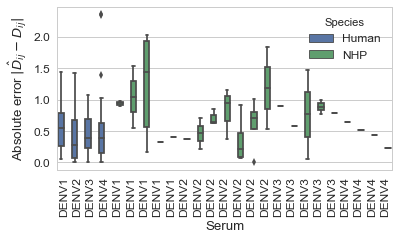

In [17]:
sns.set(style='whitegrid', font_scale=1.2)
fig, ax = plt.subplots(figsize=(6,3))
pred.sort_values(by=['Species', 'serotype'], inplace=True)

sns.boxplot(x='serum', y='abs_error', hue='Species',data=pred, ax = ax)
serotype_labels = [l.get_text().split('/')[0] for l in ax.get_xticklabels()]
ax.set_xticklabels(serotype_labels)

for label in ax.get_xticklabels():
    label.set_rotation(90)
    
ax.set_xlabel('Serum')
ax.set_ylabel(r'Absolute error $| \hat{D}_{ij} - D_{ij} |$')

plt.savefig('../../figures/png/titer_species_error.png', dpi=300, bbox_inches='tight')